<a href="https://colab.research.google.com/github/adilsonvj/SME0130---Redes-Complexas-/blob/main/Redes_Complexas_Question%C3%A1rio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://web.icmc.usp.br/SCAPINST/identidade_visual/logomarca/LOGO%20ICMC%20RGB.png" height="200"/>
</div>

# Questionário: – Comunidades

**Disciplina**: Redes Complexas SME0130 / 1º Semestre 2021
**Professor**: Francisco Rodrigues
**Aluno**: Adilson Vital Junior
**Número** USP: 9278160

In [62]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
from community import community_louvain

def get_first_lines(file_path, n_lines = 5):
  """
    Inputs:
      - file_path: string with the file path
      - n_lines: number of lines to print
    Outputs:
      - first "n_lines" of the file located in "file_path"
  """
  with open(file_path, "r") as file:
    count = 0
    for line in file:
      if count == n_lines:
        break
      else:
        print(line)
        count = count + 1

def create_network_by_txt(file_path, weighted = False):
  """
    Inputs:
      - file_path: File with the path of the .txt file for the graph
      - weighted: Bool variable if the network is weighted or not.
    Outputs:
      - G: Graph already loaded 
  """
  G = nx.Graph()
  with open(file_path,"r") as file:
    for line in file: 
      line = line.replace("\n", "").split(" ")
      if weighted:
        G.add_edge(line[0], line[1], weight = line[2])
      else:
        G.add_edge(line[0], line[1])
  return G

def plot_network(G):
  """
    Inputs:
      - G: Graph to plot
    Outputs:
      - Return the plot of the network G
  """
  plt.figure(figsize=(10,5))
  pos = nx.spring_layout(G)
  nx.draw_networkx_nodes(G, node_size = 200, node_color = "yellow", pos = pos, alpha= 0.5)
  nx.draw_networkx_edges(G, width = 0.5, pos = pos, alpha = 0.5)
  nx.draw_networkx_labels(G, pos = pos, font_weight = "bold")
  plt.show()

def get_network_description(G):
  print("A rede é formada por", len(G.nodes()), "Nós e", len(G.edges()), "Arestas")

def preprocess_graph(G, to_undirected = True, remove_selfloop = True, major_component = True, relabel = True):
  """
    Inputs:
      - G: Graph to be preprocessed
    Outputs:
      - G: Graph already preprocessed
  """
  if to_undirected:
    G = G.to_undirected()
  if remove_selfloop:
    G.remove_edges_from(nx.selfloop_edges(G))
  if major_component:
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
  if relabel:
    G = nx.convert_node_labels_to_integers(G, first_label=0)
  return G

def get_greedy_modularity(G):
  """
    Inputs:
      - Recebe grafo G que irá reconhecer as comunidades utilizando Fastgreedy
    Outputs:
      - Retorna as comunidades e o plot da rede G com os nós com diferentes cores,
      respectivas as comunidades pertencentes
  """
  communities = list(greedy_modularity_communities(G))

  for k in range(0,len(communities)):
      print('Community',k,':', sorted(communities[k]))
      
  colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'white']

  fig = plt.figure(figsize=(10,6))
  pos = nx.spring_layout(G)
  nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
  aux = 0
  for cm in communities:
      nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                      with_labels = True, node_size=300, font_color = 'white')
      aux = aux + 1

  plt.show(True)
  return communities

def modularity(G, c):
  """
    Inputs:
      - Recebe G sendo o grafo que irá ser calculado a modularidade
      - c sendo um array com as diferentes comunidades pra cada nó
    Outputs:
  """
  A = nx.adjacency_matrix(G)
  N = len(G)
  M = G.number_of_edges()
  Q = 0
  for i in np.arange(0,N):
      ki = len(list(G.neighbors(i)))
      for j in np.arange(0,N):
          if(c[i]==c[j]):
              kj = len(list(G.neighbors(j)))
              Q = Q + A[i,j]-(ki*kj)/(2*M)
  Q = Q/(2*M)
  return Q

def get_fastgreedy_modularity(G):
  """
    Inputs:
      - G: Grafo G que irá calcular as comunidades pelo método fastgreedy e 
      retornar o valor da modularidade
    Outputs:
      - Print com o valor da modularidade para a respectiva rede G
  """
  c = list(greedy_modularity_communities(G))
  communities = np.zeros(len(G.nodes()))
  nc = 0
  for k in range(0,len(c)):
    lista = list(map(int, c[k]))
    communities[sorted(lista)]=nc
    nc = nc+1
    
  print("Modularity Q = ", modularity(G,communities))

def get_louvain_modularity(G):
  """
    Inputs:
      - G : Rede G que irá ser calculado as comunidades pelo método Louvain,
      e retornado a modularidade
    Outputs:
      - Retorna a modularidade da rede G pelo método Louvain
  """
  partion = community_louvain.best_partition(G)

  communities = np.array(list(partion.values()))
    
  print("Modularity Q = ", modularity(G,communities))


def get_louvain(G):
  """
    Inputs:
      - G: Recebe grafo G que irá ser calculado as comunidades pelo método Louvain
    Outputs:
      - Retorna um plot com os nós da rede G em diferentes cores, respectivas as
      comunidades pertencentes.
  """
  partitions = community_louvain.best_partition(G)

  fig= plt.figure(figsize=(10,6))
  colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

  size = float(len(set(partitions.values())))
  count = 0
  pos=nx.spring_layout(G)
  for com in set(partitions.values()) :
      count = count + 1.
      list_nodes = [nodes for nodes in partitions.keys() if partitions[nodes] == com]
      nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
  
  nx.draw_networkx_edges(G, pos, alpha=0.5)
  plt.show()

### **1. Calcule a modularidade para a rede Jazz usando método fastgreedy.**

Primeiro, vamos abrir os dados e printar as primeiras 5 linhas de forma a entender o que está contido nestes dados.

In [21]:
path_jazz = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados 2/jazz.txt"
get_first_lines(path_jazz, n_lines = 5)

1 8

1 24

1 35

1 42

1 46



As linhas são formadas por origem e destino, sem a presença de pesos.

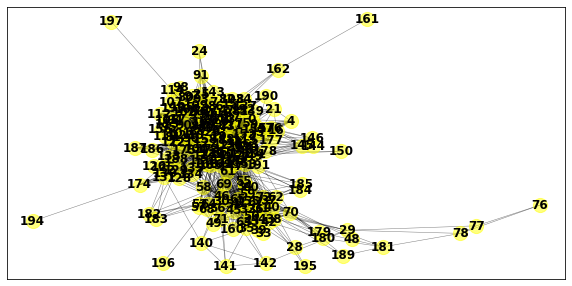

A rede é formada por 198 Nós e 2742 Arestas


In [36]:
G_jazz = create_network_by_txt(path_jazz, weighted = False)
G_jazz_ppg = preprocess_graph(G_jazz, to_undirected = False, remove_selfloop = False, major_component = False, relabel = True)
plot_network(G_jazz_ppg)
get_network_description(G_jazz_ppg)

Agora vamos calcular as comunidades da rede Jazz, através do método Louvain.
Plotando o grafo com diferentes cores para cada nó, respectivos as comunidades pertencentes.

Community 0 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community 1 : [24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]
Community 2 : [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community 3 : [186, 187, 188]


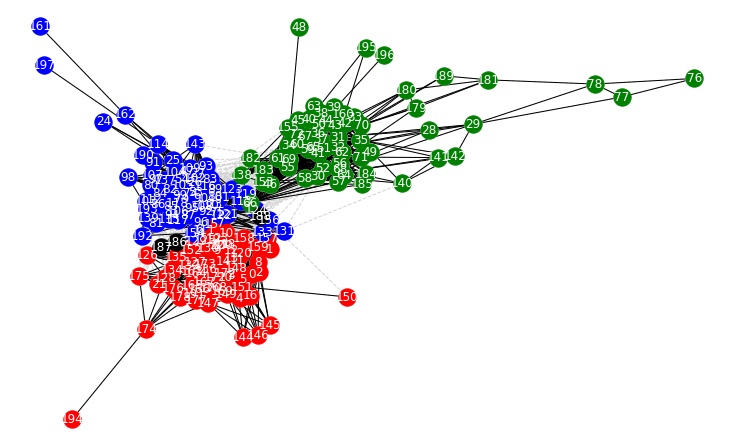

In [37]:
communities = get_greedy_modularity(G_jazz_ppg)

Agora, vamos calcular a modularidade desta rede quando usamos fastgreedy

In [42]:
get_fastgreedy_modularity(G_jazz_ppg)

Modularity Q =  0.4389078153753761


### **2.  Calcule a modularidade para a rede Jazz usando método Louvain.**

Assim como no método anterior, vamos agora plotar a rede com diferentes cores, respectivas as comunidades

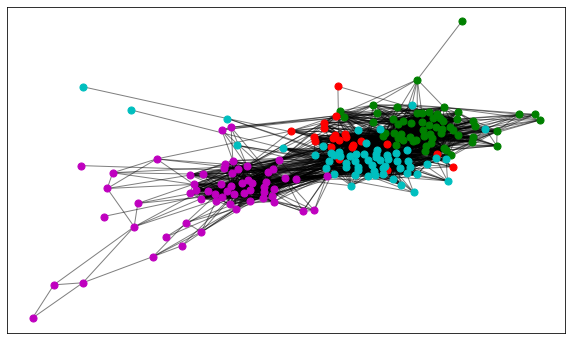

In [61]:
get_louvain(G_jazz_ppg)

Usando o método Louvain, sua modularidade será

In [56]:
get_louvain_modularity(G_jazz_ppg)

Modularity Q =  0.4375493112780496


### **3. Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para $\mu$ = 0.05,  $\mu$ = 0.1 e  $\mu$ = 0.2. Use o código a seguir para gerar as redes. Use o algoritmo de Louvain.**

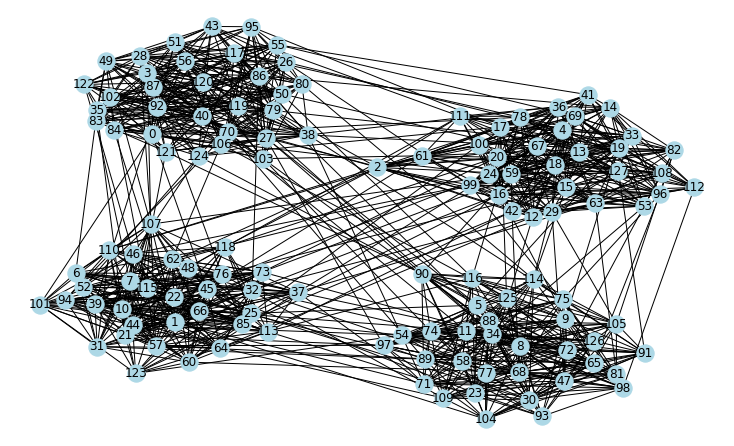

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.05
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree =
k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

Aqui, vamos utilizar o método Louvain em diferentes redes geradas artificialmente. Vamos para isso variar o valor de $\mu$ e calcular a modularidade de cada rede.

In [65]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.05

print("Using Louvain method:\n")
for mu in [0.05, 0.1, 0.2]:
  G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree =
  k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
  print("For mu = ", mu)
  get_louvain_modularity(G)

Using Louvain method:

For mu =  0.05
Modularity Q =  0.643639535397838
For mu =  0.1
Modularity Q =  0.5427818606053953
For mu =  0.2
Modularity Q =  0.44487909975820294


## **4. Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para $\mu$ = 0.05, $\mu$ = 0.1 e $\mu$ = 0.2. Use o código a seguir para gerar as redes. Use o algoritmo fastgreedy.**

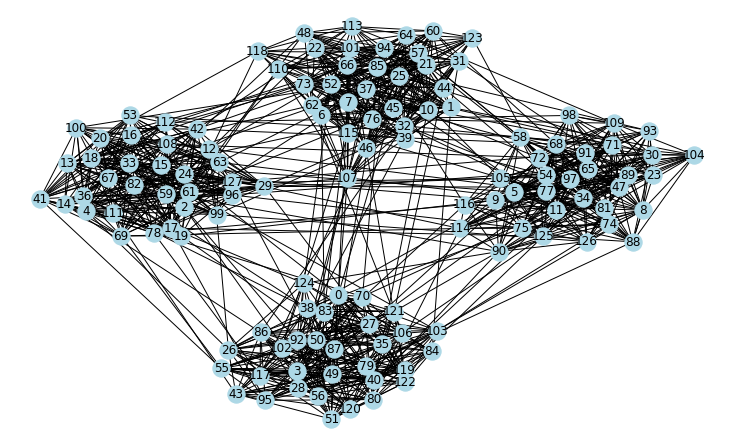

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.05
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree =
k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

Vamos repetir o experimento passado mas desta vez utilizando o método Fastgreedy

In [66]:
N = 128
tau1 = 3
tau2 = 1.5
k = 16
minc = 32
maxc = 32
mu = 0.05

print("Using Fastgreedy method:\n")
for mu in [0.05, 0.1, 0.2]:
  G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree =
  k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
  print("For mu = ", mu)
  get_fastgreedy_modularity(G)

Using Fastgreedy method:

For mu =  0.05
Modularity Q =  0.643639535397838
For mu =  0.1
Modularity Q =  0.5427818606053953
For mu =  0.2
Modularity Q =  0.4349088598177227
